NumPy ARS: 0.1531s, JAX ARS: 54.2421s


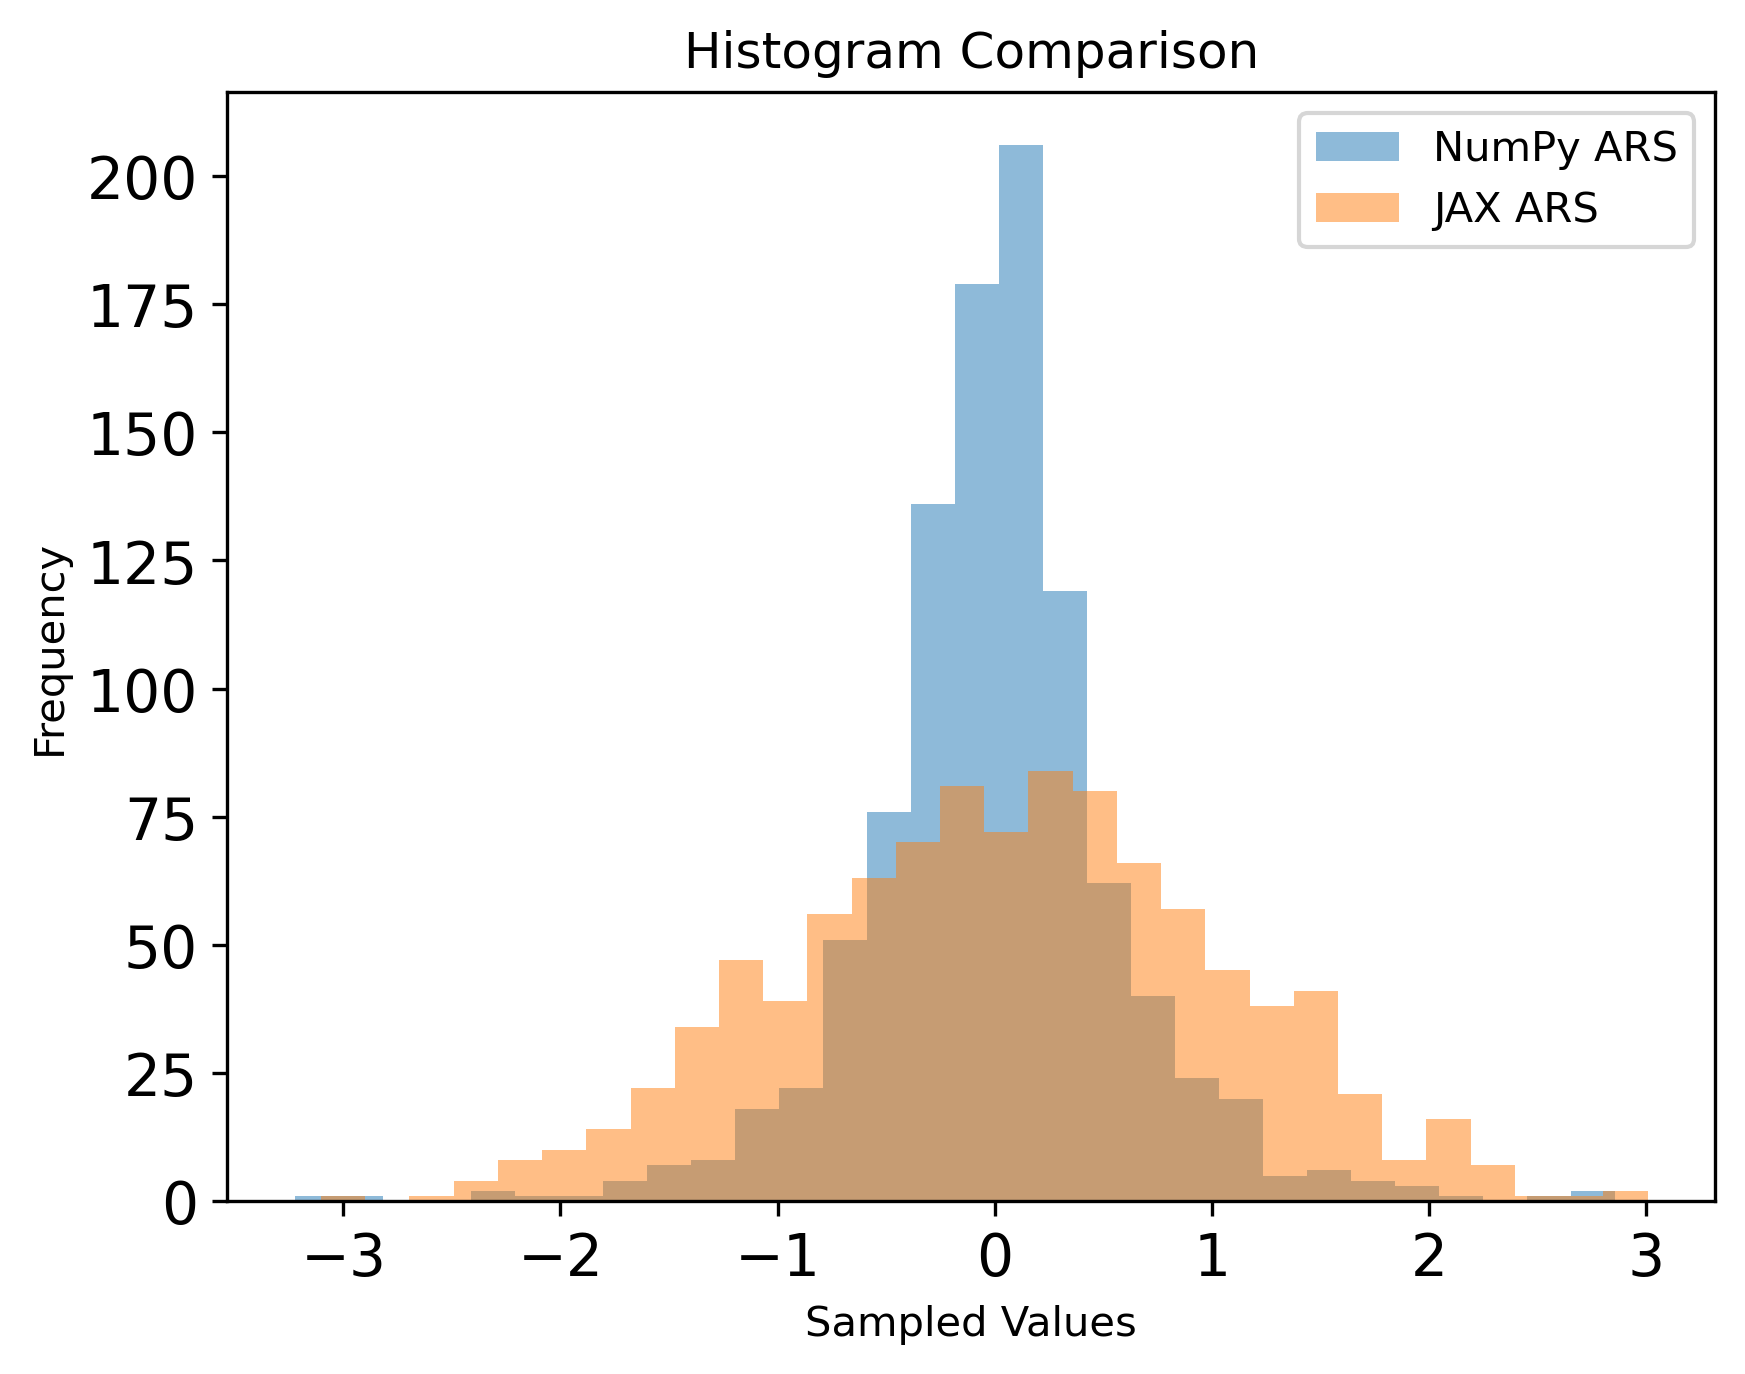

In [ ]:
import numpy as np
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
import time
from ars import ars as ars_numpy
from ars_ad import ars as ars_jax

def gaussian_pdf_numpy(x, mean=0.0, std=1.0):
    return np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

def gaussian_pdf_jax(x, mean=0.0, std=1.0):
    return jnp.exp(-0.5 * ((x - mean) / std) ** 2) / (std * jnp.sqrt(2 * jnp.pi))

num_samples = 1000
domain = (-10.0, 10.0)
x_init = [-5.0, 0.0, 5.0]

# NumPy
start_time = time.time()
samples_numpy = ars_numpy(gaussian_pdf_numpy, num_samples, x_init, domain)
time_numpy = time.time() - start_time

# JAX
key = random.PRNGKey(0)
start_time = time.time()
samples_jax = ars_jax(gaussian_pdf_jax, num_samples, x_init, domain, key)
time_jax = time.time() - start_time

print(f"NumPy ARS: {time_numpy:.4f}s, JAX ARS: {time_jax:.4f}s")

plt.figure(dpi=300)
plt.hist(samples_numpy, bins=30, alpha=0.5, label="NumPy ARS")
plt.hist(np.array(samples_jax), bins=30, alpha=0.5, label="JAX ARS")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.title("Histogram Comparison")
plt.xlabel("Sampled Values")
plt.ylabel("Frequency")
plt.show()